# Final Project - Logistic Regression
Logistic Regression for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

# Imports

In [124]:
# Importing the libraries to be used:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [125]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.
    y[y==3] = 0.
    y[y>3] = 1.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = 3

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Looking the new features after scaling

    # Split the data into training and test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [126]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0, labels=range(3))
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Logistic Regression with Lasso (L1) Regularization

In [127]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model
# with different values of C.
def logreg_model(c , X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # Create the Logistic Regression model object as described above and save it to logreg
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga', max_iter=1e6)

    # Fit the model on the training set
    logreg.fit(X_train, y_train)

    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, y_train)
    acc_train_logreg.append(acc_train)
    print(f'Logistic - L1, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    # confusion_and_classification(y_train, Yhat_train)

    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, y_test)
    acc_test_logreg.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    confusion_and_classification(y_test, Yhat_test)

# Logistic Regression with Ridge(L2) Regularization.

In [128]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg2, acc_test_logreg2):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.

    # Create the Logistic Regression model object as described above and save it to logreg2
    logreg2 = linear_model.LogisticRegression(C=c, max_iter=1e6)

    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)

    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print(f'Logistic - L2, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)
    # confusion_and_classification(y_train, Yhat_train)

    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    confusion_and_classification(y_test, Yhat_test)

In [129]:
def train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2):
    # L1
    acc_train_logreg = []
    acc_test_logreg = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
    # c_logreg = np.geomspace(0.1, 50, num=16)
    for c in c_logreg:
        logreg_model(c, X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg, acc_train_logreg, color='red', label='Training Accuracy')
    plt.plot(c_logreg, acc_test_logreg, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L1 - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # L2
    acc_train_logreg2 = []
    acc_test_logreg2 = []
    # c_logreg2 = c_logreg
    for c in c_logreg2:
        logreg2_model(c, X_train, y_train, X_test, y_test, acc_train_logreg2, acc_test_logreg2)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg2, acc_train_logreg2, color='red', label='Training Accuracy')
    plt.plot(c_logreg2, acc_test_logreg2, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L2 - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [130]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [131]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([638, 217,   0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1. -1.  0. -1.  1.  1.  1. -1.  0.  0.]
X[:10, :]:
[[7.20000e+00 4.10000e-01 3.00000e-01 2.10000e+00 8.30000e-02 3.50000e+01
  7.20000e+01 9.97000e-01 3.44000e+00 5.20000e-01 9.40000e+00]
 [9.90000e+00 5.00000e-01 5.00000e-01 1.38000e+01 2.05000e-01 4.80000e+01
  8.20000e+01 1.00242e+00 3.16000e+00 7.50000e-01 8.80000e+00]
 [7.90000e+00 4.00000e-01 3.00000e-01 1.80000e+00 1.57000e-01 2.00000e+00
  4.50000e+01 9.97270e-01 3.31000e+00 9.10000e-01 9.50000e+00]
 [8.30000e+00 6.15000e-01 2.20000e-01 2.60000e+00 8.70000e-02 6.00000e+00
  1.90000e+01 9.98200e-01 3.26000e+00 6.10000e-01 9.30000e+00]
 [1.03000e+01 3.20000e-01 4.50000e-01 6.40000e+00 7.30000e-02 5.00000e+00
  1.30000e+01 9.97600e-01 3.23000e+00 8.20000e-01 1.26000e+01]
 [5.50000e

Logistic - L1, Train Accuracy = 0.6215793588741204, C=0.06
Test Accuracy = 0.625


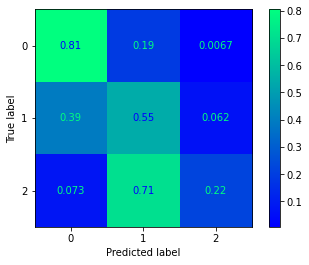

              precision    recall  f1-score   support

        -1.0       0.69      0.81      0.74       149
         0.0       0.55      0.55      0.55       130
         1.0       0.50      0.22      0.31        41
		 R2 Score: 0.14034516444154987

Logistic - L1, Train Accuracy = 0.6247068021892104, C=0.0746819815318101
Test Accuracy = 0.628125


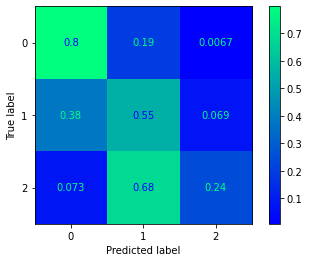

              precision    recall  f1-score   support

        -1.0       0.70      0.80      0.74       149
         0.0       0.56      0.55      0.56       130
         1.0       0.50      0.24      0.33        41
		 R2 Score: 0.14685770107456841

Logistic - L1, Train Accuracy = 0.6301798279906177, C=0.09295663942529371
Test Accuracy = 0.634375


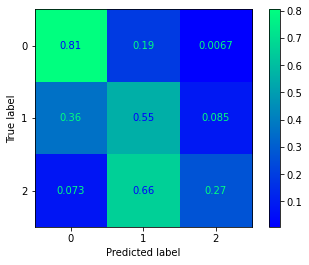

              precision    recall  f1-score   support

        -1.0       0.71      0.81      0.75       149
         0.0       0.57      0.55      0.56       130
         1.0       0.48      0.27      0.34        41
		 R2 Score: 0.1598827743406056

Logistic - L1, Train Accuracy = 0.6278342455043002, C=0.11570310048031528
Test Accuracy = 0.634375


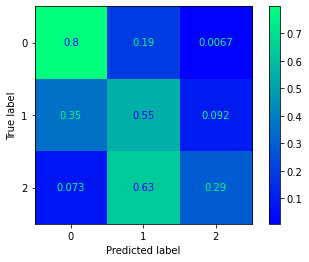

              precision    recall  f1-score   support

        -1.0       0.71      0.80      0.75       149
         0.0       0.57      0.55      0.56       130
         1.0       0.48      0.29      0.36        41
		 R2 Score: 0.1598827743406056

Logistic - L1, Train Accuracy = 0.6278342455043002, C=0.14401561355406786
Test Accuracy = 0.6375


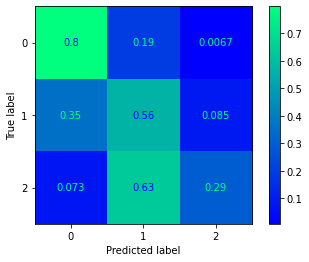

              precision    recall  f1-score   support

        -1.0       0.71      0.80      0.75       149
         0.0       0.57      0.56      0.57       130
         1.0       0.50      0.29      0.37        41
		 R2 Score: 0.16639531097362414

Logistic - L1, Train Accuracy = 0.6270523846755277, C=0.17925618986228659
Test Accuracy = 0.6375


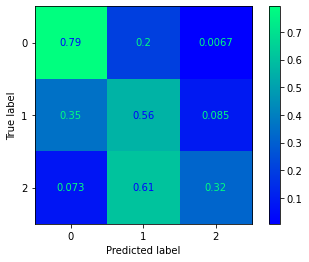

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.57      0.56      0.57       130
         1.0       0.52      0.32      0.39        41
		 R2 Score: 0.16639531097362414

Logistic - L1, Train Accuracy = 0.6262705238467553, C=0.22312012434596556
Test Accuracy = 0.640625


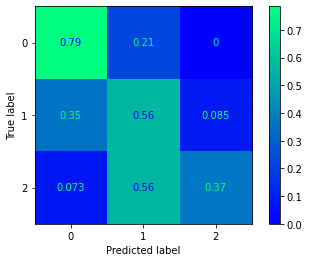

              precision    recall  f1-score   support

        -1.0       0.70      0.79      0.74       149
         0.0       0.57      0.56      0.57       130
         1.0       0.58      0.37      0.45        41
		 R2 Score: 0.19244545750569841

Logistic - L1, Train Accuracy = 0.6262705238467553, C=0.2777175500963428
Test Accuracy = 0.640625


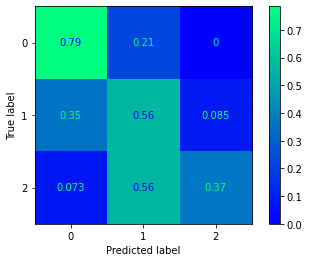

              precision    recall  f1-score   support

        -1.0       0.70      0.79      0.74       149
         0.0       0.57      0.56      0.57       130
         1.0       0.58      0.37      0.45        41
		 R2 Score: 0.19244545750569841

Logistic - L1, Train Accuracy = 0.6270523846755277, C=0.34567494912257696
Test Accuracy = 0.646875


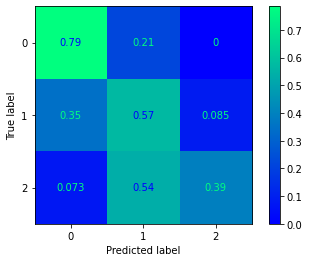

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.57      0.57       130
         1.0       0.59      0.39      0.47        41
		 R2 Score: 0.2054705307717355

Logistic - L1, Train Accuracy = 0.6278342455043002, C=0.4302615027730281
Test Accuracy = 0.65


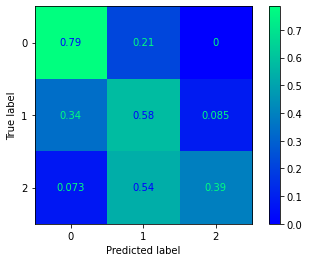

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.58      0.58       130
         1.0       0.59      0.39      0.47        41
		 R2 Score: 0.21198306740475403

Logistic - L1, Train Accuracy = 0.6286161063330727, C=0.5355463600657356
Test Accuracy = 0.646875


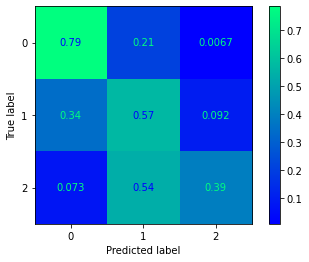

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.57      0.58       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.18593292087267976

Logistic - L1, Train Accuracy = 0.6293979671618452, C=0.6665943895309565
Test Accuracy = 0.64375


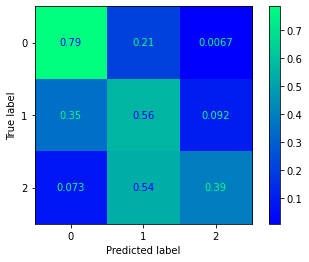

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L1, Train Accuracy = 0.6293979671618452, C=0.8297098314693189
Test Accuracy = 0.64375


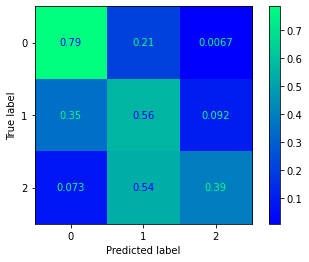

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L1, Train Accuracy = 0.6293979671618452, C=1.0327395718425485
Test Accuracy = 0.64375


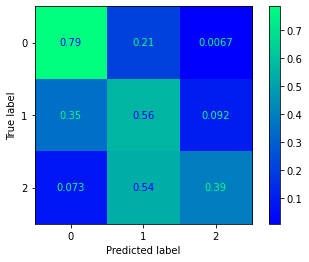

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L1, Train Accuracy = 0.6286161063330727, C=1.2854506271919115
Test Accuracy = 0.64375


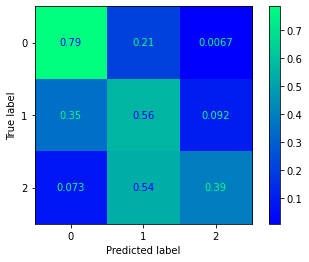

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L1, Train Accuracy = 0.6293979671618452, C=1.6
Test Accuracy = 0.64375


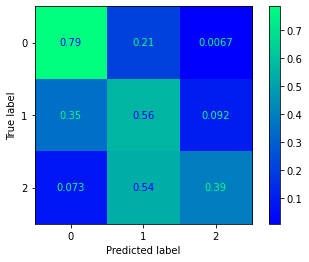

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122



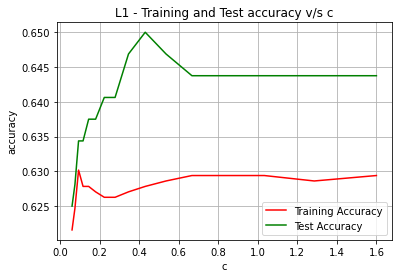

Logistic - L2, Train Accuracy = 0.6301798279906177, C=0.06
Test Accuracy = 0.640625


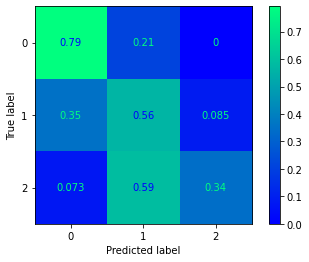

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.57      0.56      0.57       130
         1.0       0.56      0.34      0.42        41
		 R2 Score: 0.19244545750569841

Logistic - L2, Train Accuracy = 0.6270523846755277, C=0.07130946302904165
Test Accuracy = 0.640625


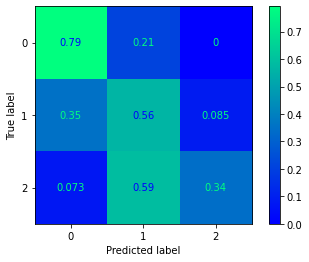

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.57      0.56      0.57       130
         1.0       0.56      0.34      0.42        41
		 R2 Score: 0.19244545750569841

Logistic - L2, Train Accuracy = 0.6270523846755277, C=0.08475065862483763
Test Accuracy = 0.640625


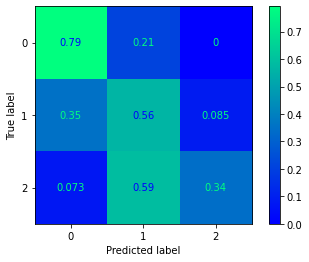

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.57      0.56      0.57       130
         1.0       0.56      0.34      0.42        41
		 R2 Score: 0.19244545750569841

Logistic - L2, Train Accuracy = 0.6270523846755277, C=0.10072539929824649
Test Accuracy = 0.640625


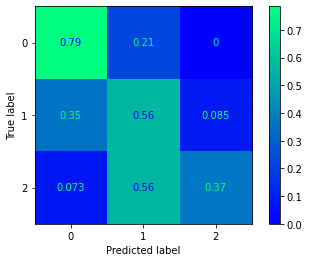

              precision    recall  f1-score   support

        -1.0       0.70      0.79      0.74       149
         0.0       0.57      0.56      0.57       130
         1.0       0.58      0.37      0.45        41
		 R2 Score: 0.19244545750569841

Logistic - L2, Train Accuracy = 0.6278342455043002, C=0.1197112356223961
Test Accuracy = 0.640625


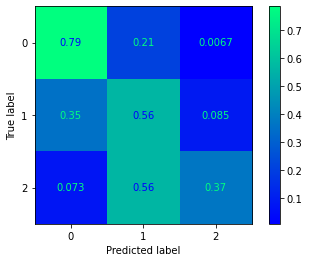

              precision    recall  f1-score   support

        -1.0       0.70      0.79      0.74       149
         0.0       0.57      0.56      0.57       130
         1.0       0.56      0.37      0.44        41
		 R2 Score: 0.17290784760664268

Logistic - L2, Train Accuracy = 0.6270523846755277, C=0.1422757321796025
Test Accuracy = 0.64375


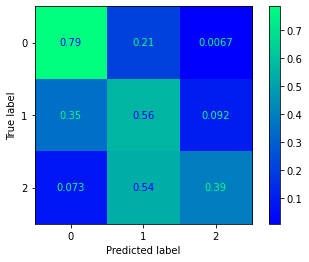

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6278342455043002, C=0.16909343439651997
Test Accuracy = 0.64375


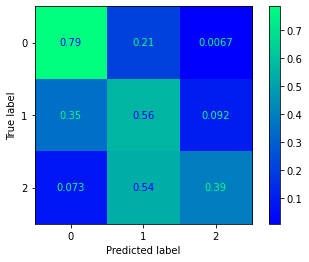

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6286161063330727, C=0.200966033475872
Test Accuracy = 0.64375


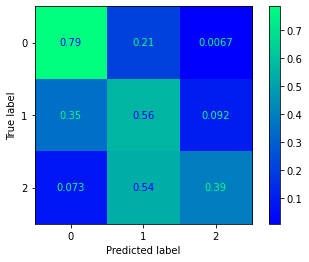

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6286161063330727, C=0.23884633223734736
Test Accuracy = 0.64375


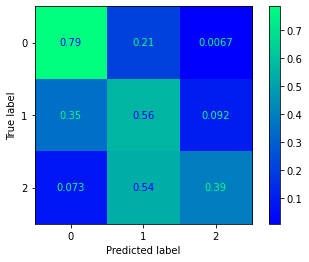

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6286161063330727, C=0.283866728305022
Test Accuracy = 0.64375


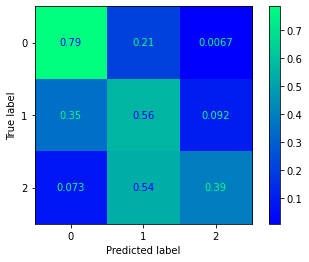

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6293979671618452, C=0.33737306612069967
Test Accuracy = 0.64375


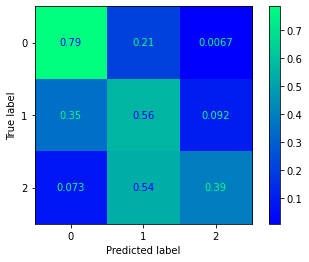

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6286161063330727, C=0.4009648697588076
Test Accuracy = 0.64375


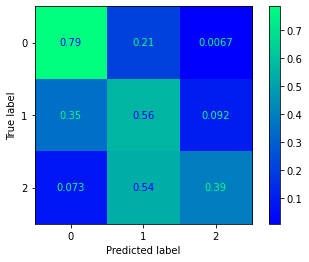

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6286161063330727, C=0.47654315926683666
Test Accuracy = 0.64375


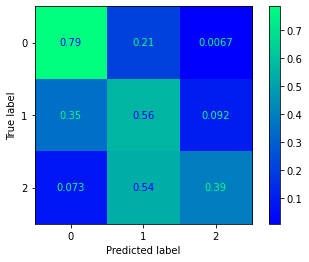

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6293979671618452, C=0.5663672799580199
Test Accuracy = 0.64375


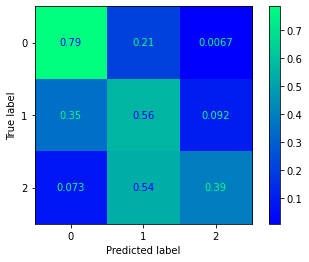

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6293979671618452, C=0.6731224435170884
Test Accuracy = 0.64375


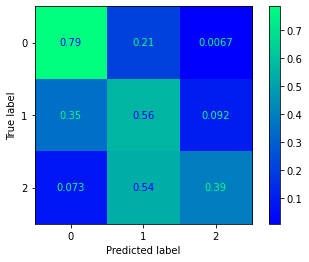

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6293979671618452, C=0.8
Test Accuracy = 0.64375


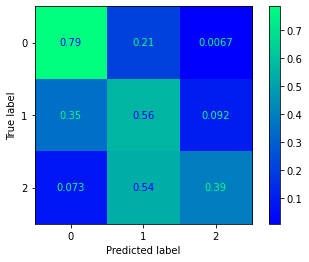

              precision    recall  f1-score   support

        -1.0       0.71      0.79      0.75       149
         0.0       0.58      0.56      0.57       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.17942038423966122



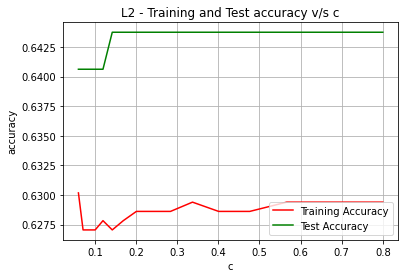

In [132]:
num_of_different_c = 16
c_logreg = np.geomspace(0.06, 1.6, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6458170445660673, C=0.06
Test Accuracy = 0.63125


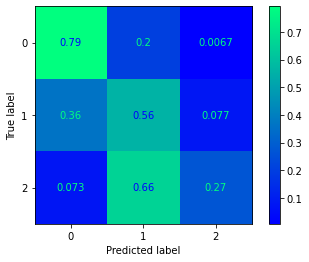

              precision    recall  f1-score   support

        -1.0       0.70      0.79      0.74       149
         0.0       0.56      0.56      0.56       130
         1.0       0.50      0.27      0.35        41
		 R2 Score: 0.15337023770758706

Logistic - L1, Train Accuracy = 0.6489444878811571, C=0.07130946302904165
Test Accuracy = 0.6375


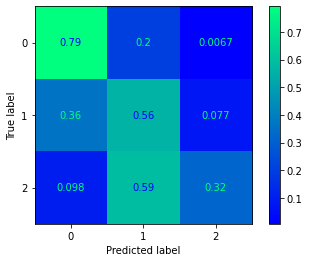

              precision    recall  f1-score   support

        -1.0       0.70      0.79      0.74       149
         0.0       0.57      0.56      0.57       130
         1.0       0.54      0.32      0.40        41
		 R2 Score: 0.14685770107456841

Logistic - L1, Train Accuracy = 0.6575449569976545, C=0.08475065862483763
Test Accuracy = 0.646875


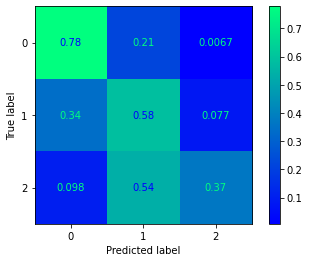

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       149
         0.0       0.58      0.58      0.58       130
         1.0       0.58      0.37      0.45        41
		 R2 Score: 0.16639531097362414

Logistic - L1, Train Accuracy = 0.6622361219702892, C=0.10072539929824649
Test Accuracy = 0.65


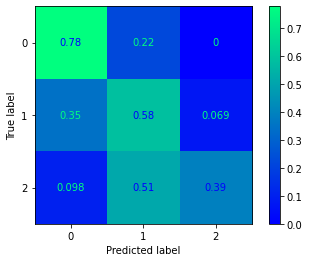

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       149
         0.0       0.58      0.58      0.58       130
         1.0       0.64      0.39      0.48        41
		 R2 Score: 0.19244545750569841

Logistic - L1, Train Accuracy = 0.6669272869429241, C=0.1197112356223961
Test Accuracy = 0.6625


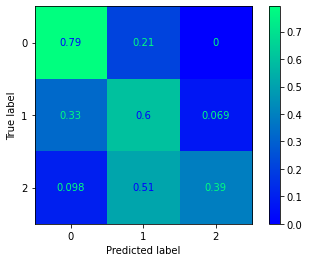

              precision    recall  f1-score   support

        -1.0       0.72      0.79      0.75       149
         0.0       0.60      0.60      0.60       130
         1.0       0.64      0.39      0.48        41
		 R2 Score: 0.21849560403777257

Logistic - L1, Train Accuracy = 0.6677091477716967, C=0.1422757321796025
Test Accuracy = 0.6625


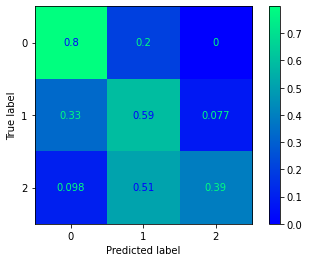

              precision    recall  f1-score   support

        -1.0       0.72      0.80      0.76       149
         0.0       0.60      0.59      0.60       130
         1.0       0.62      0.39      0.48        41
		 R2 Score: 0.21849560403777257

Logistic - L1, Train Accuracy = 0.674745895230649, C=0.16909343439651997
Test Accuracy = 0.665625


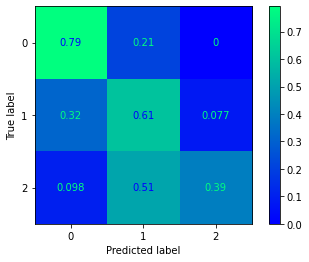

              precision    recall  f1-score   support

        -1.0       0.72      0.79      0.76       149
         0.0       0.60      0.61      0.61       130
         1.0       0.62      0.39      0.48        41
		 R2 Score: 0.22500814067079122

Logistic - L1, Train Accuracy = 0.673182173573104, C=0.200966033475872
Test Accuracy = 0.675


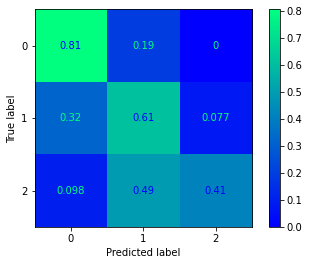

              precision    recall  f1-score   support

        -1.0       0.73      0.81      0.76       149
         0.0       0.62      0.61      0.61       130
         1.0       0.63      0.41      0.50        41
		 R2 Score: 0.24454575056984684

Logistic - L1, Train Accuracy = 0.6802189210320563, C=0.23884633223734736
Test Accuracy = 0.675


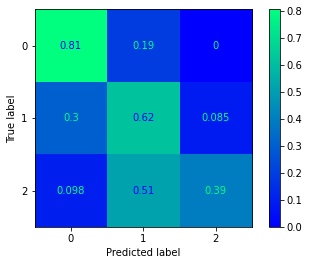

              precision    recall  f1-score   support

        -1.0       0.74      0.81      0.77       149
         0.0       0.62      0.62      0.62       130
         1.0       0.59      0.39      0.47        41
		 R2 Score: 0.24454575056984684

Logistic - L1, Train Accuracy = 0.6872556684910086, C=0.283866728305022
Test Accuracy = 0.68125


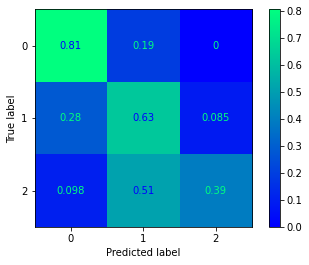

              precision    recall  f1-score   support

        -1.0       0.75      0.81      0.77       149
         0.0       0.62      0.63      0.63       130
         1.0       0.59      0.39      0.47        41
		 R2 Score: 0.25757082383588403

Logistic - L1, Train Accuracy = 0.6872556684910086, C=0.33737306612069967
Test Accuracy = 0.671875


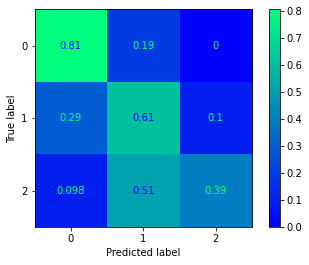

              precision    recall  f1-score   support

        -1.0       0.74      0.81      0.77       149
         0.0       0.61      0.61      0.61       130
         1.0       0.55      0.39      0.46        41
		 R2 Score: 0.2380332139368283

Logistic - L1, Train Accuracy = 0.6864738076622361, C=0.4009648697588076
Test Accuracy = 0.659375


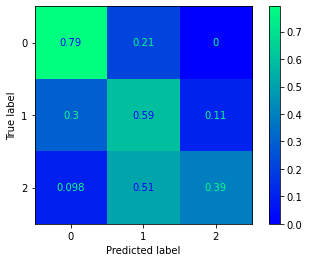

              precision    recall  f1-score   support

        -1.0       0.73      0.79      0.76       149
         0.0       0.60      0.59      0.59       130
         1.0       0.53      0.39      0.45        41
		 R2 Score: 0.21198306740475403

Logistic - L1, Train Accuracy = 0.689601250977326, C=0.47654315926683666
Test Accuracy = 0.659375


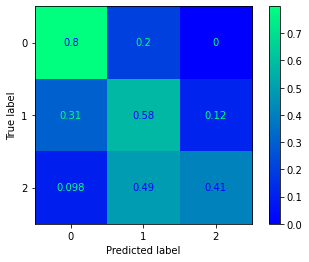

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.60      0.58      0.59       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.21198306740475403

Logistic - L1, Train Accuracy = 0.6903831118060985, C=0.5663672799580199
Test Accuracy = 0.659375


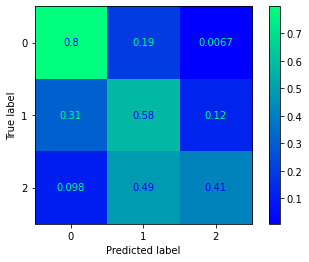

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.60      0.58      0.59       130
         1.0       0.52      0.41      0.46        41
		 R2 Score: 0.19244545750569841

Logistic - L1, Train Accuracy = 0.6872556684910086, C=0.6731224435170884
Test Accuracy = 0.659375


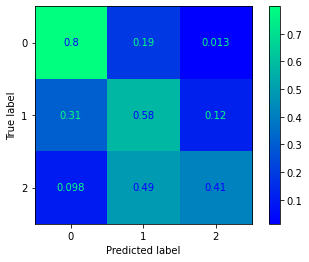

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.61      0.58      0.59       130
         1.0       0.50      0.41      0.45        41
		 R2 Score: 0.17290784760664268

Logistic - L1, Train Accuracy = 0.6880375293197811, C=0.8
Test Accuracy = 0.665625


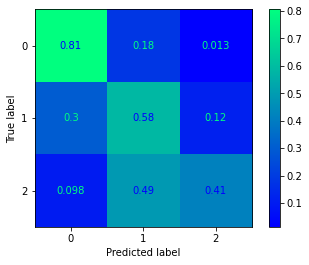

              precision    recall  f1-score   support

        -1.0       0.74      0.81      0.77       149
         0.0       0.62      0.58      0.60       130
         1.0       0.50      0.41      0.45        41
		 R2 Score: 0.18593292087267976



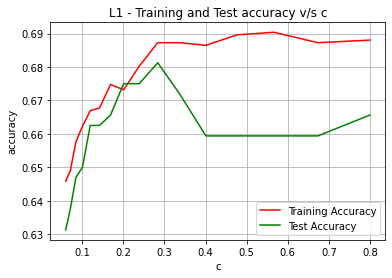

Logistic - L2, Train Accuracy = 0.6856919468334637, C=0.06
Test Accuracy = 0.665625


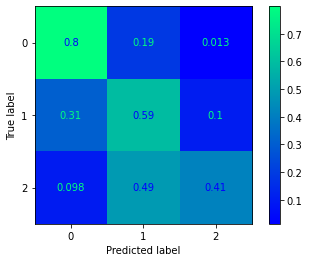

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.62      0.59      0.60       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.18593292087267976

Logistic - L2, Train Accuracy = 0.6864738076622361, C=0.07130946302904165
Test Accuracy = 0.6625


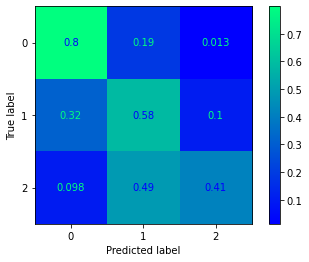

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.61      0.58      0.60       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6872556684910086, C=0.08475065862483763
Test Accuracy = 0.665625


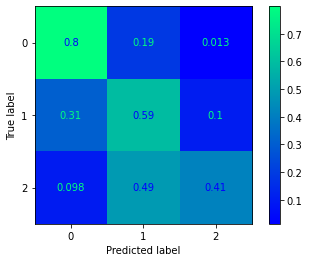

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.62      0.59      0.60       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.18593292087267976

Logistic - L2, Train Accuracy = 0.6872556684910086, C=0.10072539929824649
Test Accuracy = 0.665625


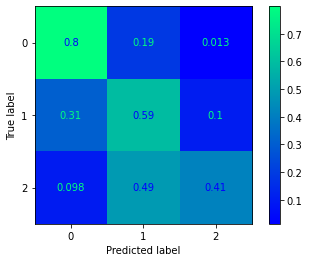

              precision    recall  f1-score   support

        -1.0       0.73      0.80      0.76       149
         0.0       0.62      0.59      0.60       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.18593292087267976

Logistic - L2, Train Accuracy = 0.6864738076622361, C=0.1197112356223961
Test Accuracy = 0.665625


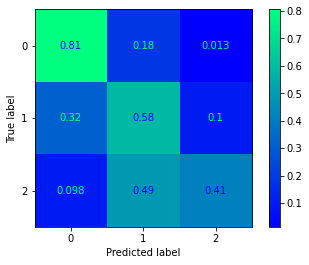

              precision    recall  f1-score   support

        -1.0       0.73      0.81      0.76       149
         0.0       0.62      0.58      0.60       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.18593292087267976

Logistic - L2, Train Accuracy = 0.6880375293197811, C=0.1422757321796025
Test Accuracy = 0.6625


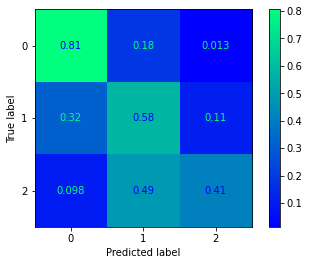

              precision    recall  f1-score   support

        -1.0       0.73      0.81      0.76       149
         0.0       0.61      0.58      0.60       130
         1.0       0.52      0.41      0.46        41
		 R2 Score: 0.17942038423966122

Logistic - L2, Train Accuracy = 0.6903831118060985, C=0.16909343439651997
Test Accuracy = 0.659375


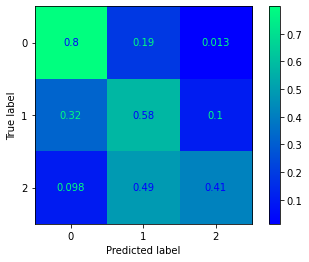

              precision    recall  f1-score   support

        -1.0       0.72      0.80      0.76       149
         0.0       0.61      0.58      0.59       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.17290784760664268

Logistic - L2, Train Accuracy = 0.6927286942924159, C=0.200966033475872
Test Accuracy = 0.659375


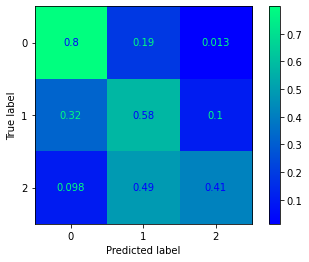

              precision    recall  f1-score   support

        -1.0       0.72      0.80      0.76       149
         0.0       0.61      0.58      0.59       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.17290784760664268

Logistic - L2, Train Accuracy = 0.691164972634871, C=0.23884633223734736
Test Accuracy = 0.659375


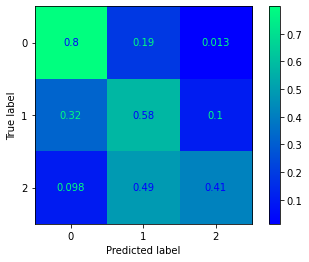

              precision    recall  f1-score   support

        -1.0       0.72      0.80      0.76       149
         0.0       0.61      0.58      0.59       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.17290784760664268

Logistic - L2, Train Accuracy = 0.6935105551211884, C=0.283866728305022
Test Accuracy = 0.65625


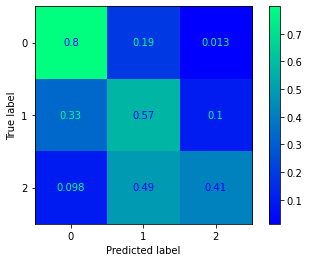

              precision    recall  f1-score   support

        -1.0       0.72      0.80      0.76       149
         0.0       0.61      0.57      0.59       130
         1.0       0.53      0.41      0.47        41
		 R2 Score: 0.16639531097362414

Logistic - L2, Train Accuracy = 0.6942924159499609, C=0.33737306612069967
Test Accuracy = 0.653125


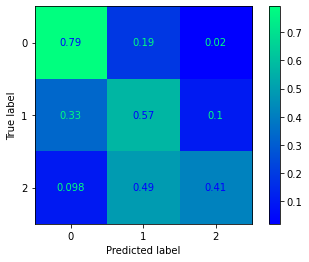

              precision    recall  f1-score   support

        -1.0       0.72      0.79      0.75       149
         0.0       0.61      0.57      0.59       130
         1.0       0.52      0.41      0.46        41
		 R2 Score: 0.14034516444154987

Logistic - L2, Train Accuracy = 0.6935105551211884, C=0.4009648697588076
Test Accuracy = 0.646875


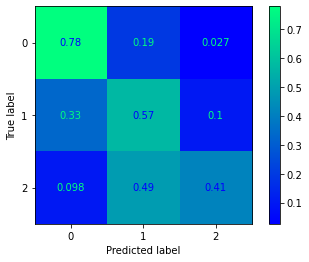

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       149
         0.0       0.60      0.57      0.58       130
         1.0       0.50      0.41      0.45        41
		 R2 Score: 0.10778248127645707

Logistic - L2, Train Accuracy = 0.6958561376075059, C=0.47654315926683666
Test Accuracy = 0.646875


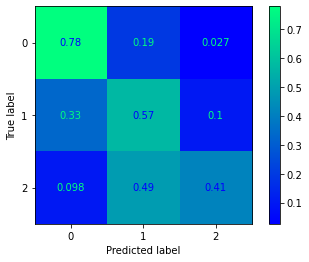

              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74       149
         0.0       0.60      0.57      0.58       130
         1.0       0.50      0.41      0.45        41
		 R2 Score: 0.10778248127645707

Logistic - L2, Train Accuracy = 0.6974198592650508, C=0.5663672799580199
Test Accuracy = 0.64375


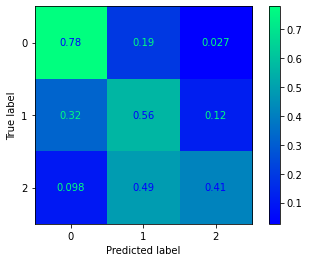

              precision    recall  f1-score   support

        -1.0       0.72      0.78      0.75       149
         0.0       0.60      0.56      0.58       130
         1.0       0.47      0.41      0.44        41
		 R2 Score: 0.10126994464343853

Logistic - L2, Train Accuracy = 0.6982017200938233, C=0.6731224435170884
Test Accuracy = 0.64375


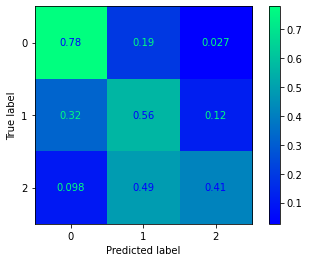

              precision    recall  f1-score   support

        -1.0       0.72      0.78      0.75       149
         0.0       0.60      0.56      0.58       130
         1.0       0.47      0.41      0.44        41
		 R2 Score: 0.10126994464343853

Logistic - L2, Train Accuracy = 0.6958561376075059, C=0.8
Test Accuracy = 0.64375


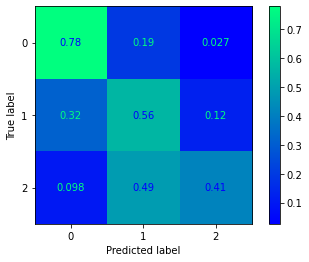

              precision    recall  f1-score   support

        -1.0       0.72      0.78      0.75       149
         0.0       0.60      0.56      0.58       130
         1.0       0.46      0.41      0.44        41
		 R2 Score: 0.10126994464343853



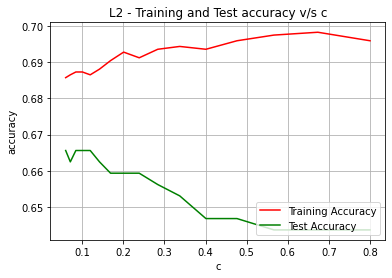

In [133]:
# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train White Wines Data

In [134]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([2198, 1060,    0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[ 0.  0.  0.  1.  0.  1.  1.  0.  0. -1.]
X[:10, :]:
[[7.4000e+00 2.6000e-01 3.0000e-01 7.9000e+00 4.9000e-02 3.8000e+01
  1.5700e+02 9.9630e-01 3.1300e+00 4.8000e-01 8.9000e+00]
 [8.6000e+00 1.6000e-01 4.9000e-01 7.3000e+00 4.3000e-02 9.0000e+00
  6.3000e+01 9.9530e-01 3.1300e+00 5.9000e-01 1.0500e+01]
 [7.5000e+00 2.4000e-01 3.1000e-01 1.3100e+01 5.0000e-02 2.6000e+01
  1.8000e+02 9.9884e-01 3.0500e+00 5.3000e-01 9.1000e+00]
 [6.7000e+00 2.5000e-01 3.3000e-01 2.9000e+00 5.7000e-02 5.2000e+01
  1.7300e+02 9.9340e-01 3.0200e+00 4.8000e-01 9.5000e+00]
 [7.5000e+00 2.6000e-01 2.5000e-01 1.7000e+00 3.8000e-02 2.9000e+01
  1.2900e+02 9.9312e-01 3.4500e+00 5.6000e-01 1.0400e+01]
 [6.5000e+00 3.3000e-01 3.0000e-01 3.8000e+00

Logistic - L1, Train Accuracy = 0.5691679428279734, C=0.06
Test Accuracy = 0.5938775510204082


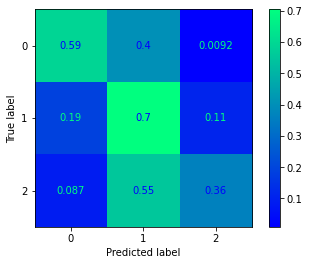

              precision    recall  f1-score   support

        -1.0       0.65      0.59      0.62       326
         0.0       0.56      0.70      0.63       447
         1.0       0.60      0.36      0.45       207
		 R2 Score: 0.11098254748818814

Logistic - L1, Train Accuracy = 0.5671260847371108, C=0.07130946302904165
Test Accuracy = 0.6


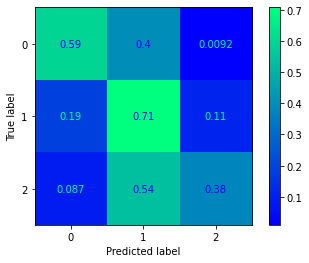

              precision    recall  f1-score   support

        -1.0       0.66      0.59      0.62       326
         0.0       0.57      0.71      0.63       447
         1.0       0.61      0.38      0.47       207
		 R2 Score: 0.12255327355124856

Logistic - L1, Train Accuracy = 0.5655946911689638, C=0.08475065862483763
Test Accuracy = 0.5959183673469388


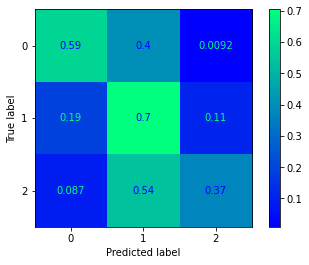

              precision    recall  f1-score   support

        -1.0       0.65      0.59      0.62       326
         0.0       0.56      0.70      0.63       447
         1.0       0.61      0.37      0.46       207
		 R2 Score: 0.11483945617587499

Logistic - L1, Train Accuracy = 0.5661051556916794, C=0.10072539929824649
Test Accuracy = 0.5938775510204082


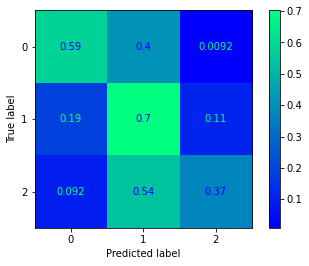

              precision    recall  f1-score   support

        -1.0       0.65      0.59      0.62       326
         0.0       0.56      0.70      0.63       447
         1.0       0.60      0.37      0.46       207
		 R2 Score: 0.10519718445665793

Logistic - L1, Train Accuracy = 0.5661051556916794, C=0.1197112356223961
Test Accuracy = 0.5897959183673469


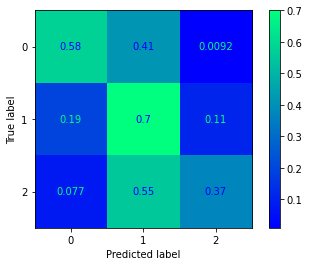

              precision    recall  f1-score   support

        -1.0       0.65      0.58      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.60      0.37      0.46       207
		 R2 Score: 0.11483945617587499

Logistic - L1, Train Accuracy = 0.5673813169984686, C=0.1422757321796025
Test Accuracy = 0.5908163265306122


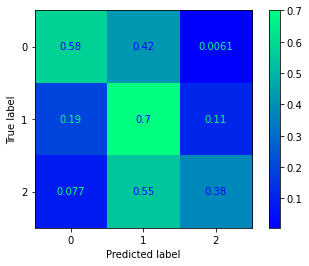

              precision    recall  f1-score   support

        -1.0       0.65      0.58      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.60      0.38      0.46       207
		 R2 Score: 0.12255327355124856

Logistic - L1, Train Accuracy = 0.5678917815211842, C=0.16909343439651997
Test Accuracy = 0.5928571428571429


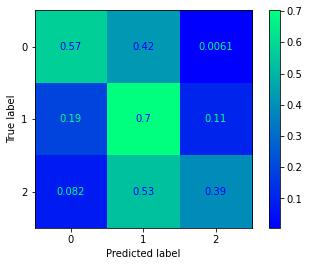

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.62      0.39      0.47       207
		 R2 Score: 0.1206248192074052

Logistic - L1, Train Accuracy = 0.5694231750893313, C=0.200966033475872
Test Accuracy = 0.5908163265306122


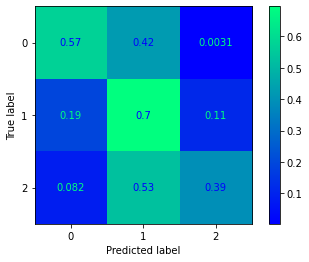

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.39      0.48       207
		 R2 Score: 0.12255327355124856

Logistic - L1, Train Accuracy = 0.5694231750893313, C=0.23884633223734736
Test Accuracy = 0.5928571428571429


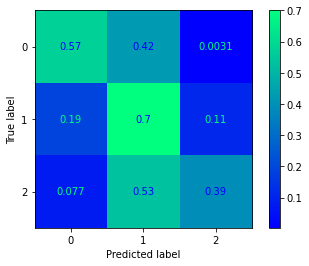

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.39      0.48       207
		 R2 Score: 0.13219554527046562

Logistic - L1, Train Accuracy = 0.5681470137825421, C=0.283866728305022
Test Accuracy = 0.5918367346938775


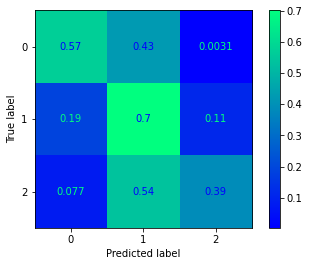

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.62      0.39      0.47       207
		 R2 Score: 0.13026709092662225

Logistic - L1, Train Accuracy = 0.5686574783052578, C=0.33737306612069967
Test Accuracy = 0.5938775510204082


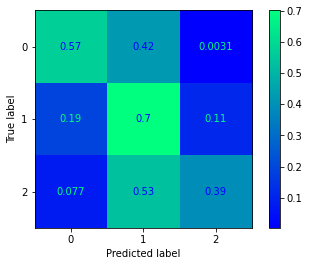

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.62      0.39      0.48       207
		 R2 Score: 0.1341239996143091

Logistic - L1, Train Accuracy = 0.569933639612047, C=0.4009648697588076
Test Accuracy = 0.5897959183673469


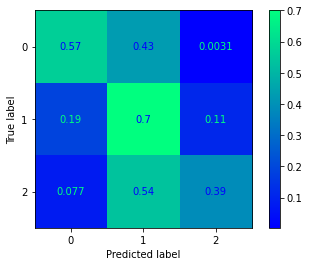

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.55      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.1264101822389354

Logistic - L1, Train Accuracy = 0.5701888718734048, C=0.47654315926683666
Test Accuracy = 0.5897959183673469


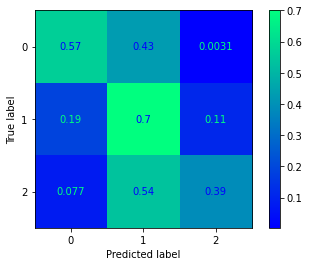

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.55      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.1264101822389354

Logistic - L1, Train Accuracy = 0.5696784073506891, C=0.5663672799580199
Test Accuracy = 0.5897959183673469


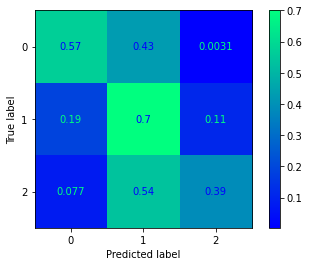

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.55      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.1264101822389354

Logistic - L1, Train Accuracy = 0.5696784073506891, C=0.6731224435170884
Test Accuracy = 0.5908163265306122


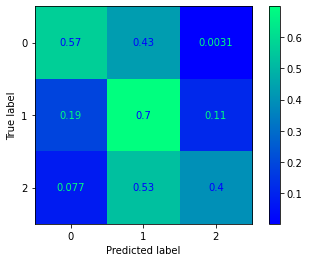

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.40      0.48       207
		 R2 Score: 0.12833863658277878

Logistic - L1, Train Accuracy = 0.5691679428279734, C=0.8
Test Accuracy = 0.5918367346938775


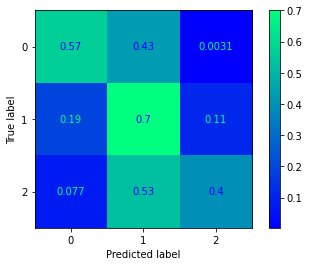

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.62      0.40      0.48       207
		 R2 Score: 0.13026709092662225



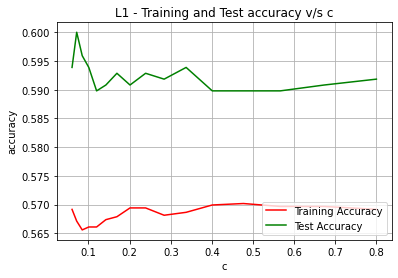

Logistic - L2, Train Accuracy = 0.5678917815211842, C=0.06
Test Accuracy = 0.5867346938775511


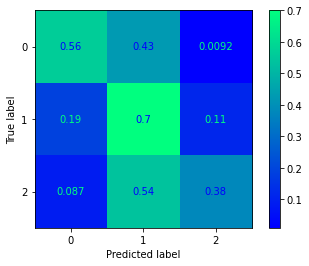

              precision    recall  f1-score   support

        -1.0       0.64      0.56      0.60       326
         0.0       0.56      0.70      0.62       447
         1.0       0.60      0.38      0.46       207
		 R2 Score: 0.09748336708128424

Logistic - L2, Train Accuracy = 0.5671260847371108, C=0.07130946302904165
Test Accuracy = 0.5857142857142857


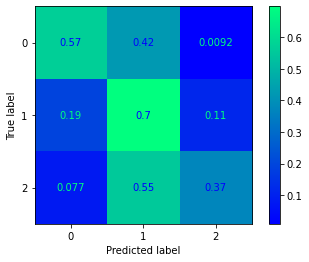

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.60       326
         0.0       0.55      0.70      0.62       447
         1.0       0.59      0.37      0.46       207
		 R2 Score: 0.1071256388005013

Logistic - L2, Train Accuracy = 0.566870852475753, C=0.08475065862483763
Test Accuracy = 0.5857142857142857


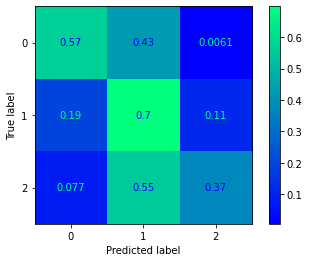

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.60       326
         0.0       0.55      0.70      0.62       447
         1.0       0.60      0.37      0.46       207
		 R2 Score: 0.11291100183203151

Logistic - L2, Train Accuracy = 0.5661051556916794, C=0.10072539929824649
Test Accuracy = 0.5867346938775511


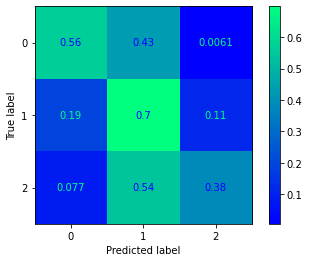

              precision    recall  f1-score   support

        -1.0       0.65      0.56      0.60       326
         0.0       0.55      0.70      0.62       447
         1.0       0.60      0.38      0.47       207
		 R2 Score: 0.11483945617587499

Logistic - L2, Train Accuracy = 0.566870852475753, C=0.1197112356223961
Test Accuracy = 0.5887755102040816


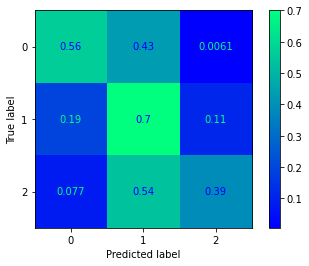

              precision    recall  f1-score   support

        -1.0       0.65      0.56      0.60       326
         0.0       0.55      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.11869636486356183

Logistic - L2, Train Accuracy = 0.5678917815211842, C=0.1422757321796025
Test Accuracy = 0.5877551020408164


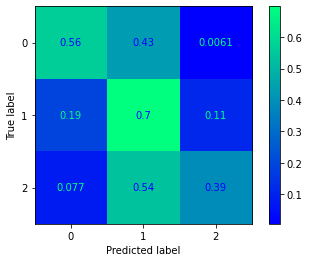

              precision    recall  f1-score   support

        -1.0       0.65      0.56      0.60       326
         0.0       0.55      0.70      0.62       447
         1.0       0.60      0.39      0.47       207
		 R2 Score: 0.11676791051971835

Logistic - L2, Train Accuracy = 0.5681470137825421, C=0.16909343439651997
Test Accuracy = 0.5887755102040816


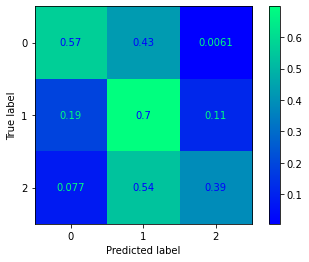

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.60      0.39      0.47       207
		 R2 Score: 0.11869636486356183

Logistic - L2, Train Accuracy = 0.5678917815211842, C=0.200966033475872
Test Accuracy = 0.5877551020408164


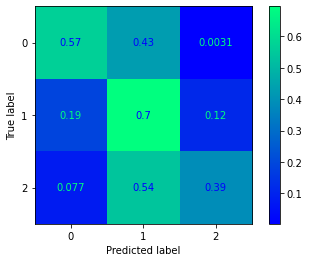

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.55      0.70      0.62       447
         1.0       0.60      0.39      0.47       207
		 R2 Score: 0.12255327355124856

Logistic - L2, Train Accuracy = 0.5689127105666156, C=0.23884633223734736
Test Accuracy = 0.5887755102040816


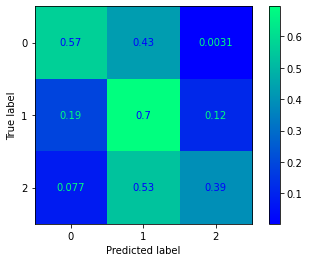

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.55      0.70      0.62       447
         1.0       0.60      0.39      0.48       207
		 R2 Score: 0.12448172789509204

Logistic - L2, Train Accuracy = 0.5689127105666156, C=0.283866728305022
Test Accuracy = 0.5887755102040816


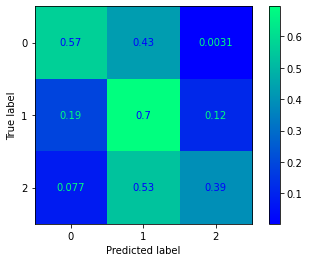

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.55      0.70      0.62       447
         1.0       0.60      0.39      0.48       207
		 R2 Score: 0.12448172789509204

Logistic - L2, Train Accuracy = 0.569933639612047, C=0.33737306612069967
Test Accuracy = 0.5908163265306122


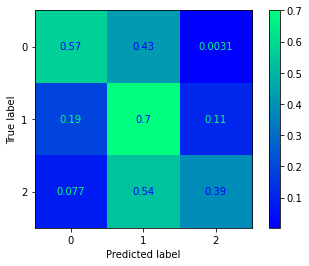

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.12833863658277878

Logistic - L2, Train Accuracy = 0.569933639612047, C=0.4009648697588076
Test Accuracy = 0.5908163265306122


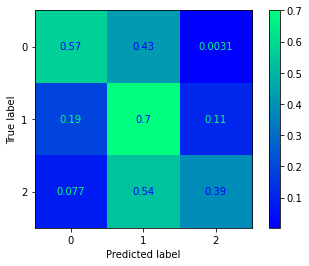

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.12833863658277878

Logistic - L2, Train Accuracy = 0.5709545686574783, C=0.47654315926683666
Test Accuracy = 0.5897959183673469


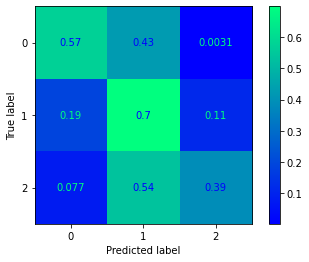

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.1264101822389354

Logistic - L2, Train Accuracy = 0.5704441041347627, C=0.5663672799580199
Test Accuracy = 0.5897959183673469


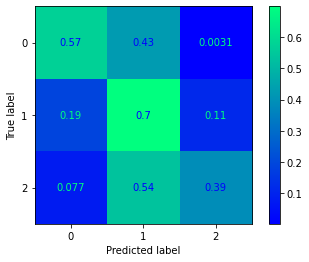

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.61      0.39      0.47       207
		 R2 Score: 0.1264101822389354

Logistic - L2, Train Accuracy = 0.5696784073506891, C=0.6731224435170884
Test Accuracy = 0.5908163265306122


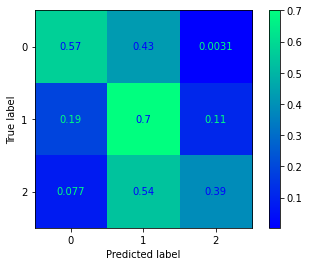

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.62      0.39      0.47       207
		 R2 Score: 0.12833863658277878

Logistic - L2, Train Accuracy = 0.569933639612047, C=0.8
Test Accuracy = 0.5928571428571429


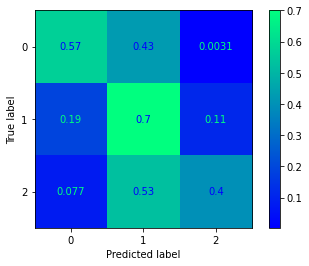

              precision    recall  f1-score   support

        -1.0       0.65      0.57      0.61       326
         0.0       0.56      0.70      0.62       447
         1.0       0.62      0.40      0.48       207
		 R2 Score: 0.13219554527046562



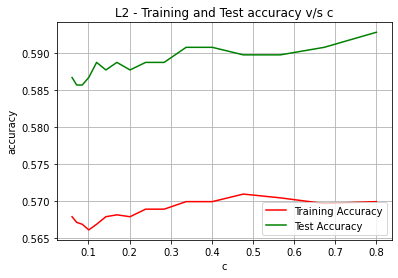

In [135]:
c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6010719754977029, C=0.06
Test Accuracy = 0.5969387755102041


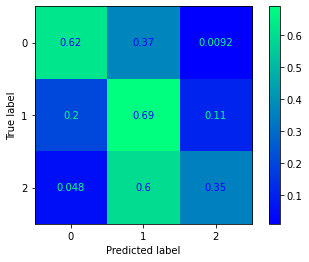

              precision    recall  f1-score   support

        -1.0       0.67      0.62      0.65       326
         0.0       0.56      0.69      0.62       447
         1.0       0.59      0.35      0.44       207
		 R2 Score: 0.16305081477196015

Logistic - L1, Train Accuracy = 0.6020929045431342, C=0.07130946302904165
Test Accuracy = 0.6061224489795919


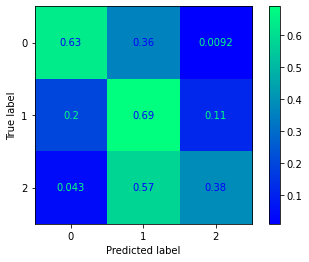

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.57      0.69      0.62       447
         1.0       0.59      0.38      0.46       207
		 R2 Score: 0.1861922668980811

Logistic - L1, Train Accuracy = 0.6041347626339969, C=0.08475065862483763
Test Accuracy = 0.6112244897959184


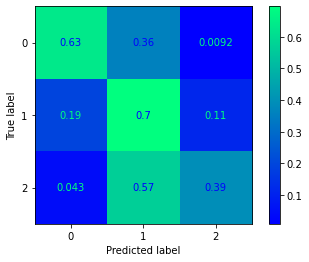

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       326
         0.0       0.57      0.70      0.63       447
         1.0       0.60      0.39      0.48       207
		 R2 Score: 0.19583453861729816

Logistic - L1, Train Accuracy = 0.6046452271567127, C=0.10072539929824649
Test Accuracy = 0.6122448979591837


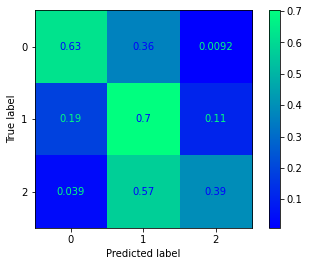

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       326
         0.0       0.57      0.70      0.63       447
         1.0       0.61      0.39      0.48       207
		 R2 Score: 0.20354835599267185

Logistic - L1, Train Accuracy = 0.6046452271567127, C=0.1197112356223961
Test Accuracy = 0.610204081632653


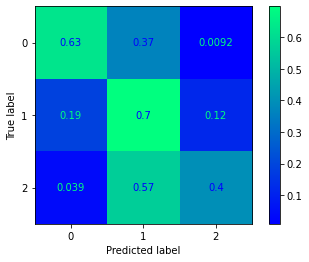

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       326
         0.0       0.57      0.70      0.63       447
         1.0       0.60      0.40      0.48       207
		 R2 Score: 0.199691447304985

Logistic - L1, Train Accuracy = 0.6059213884635017, C=0.1422757321796025
Test Accuracy = 0.6081632653061224


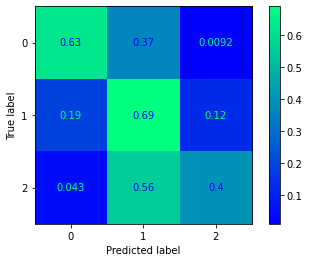

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       326
         0.0       0.57      0.69      0.62       447
         1.0       0.59      0.40      0.48       207
		 R2 Score: 0.19004917558576795

Logistic - L1, Train Accuracy = 0.6079632465543645, C=0.16909343439651997
Test Accuracy = 0.6081632653061224


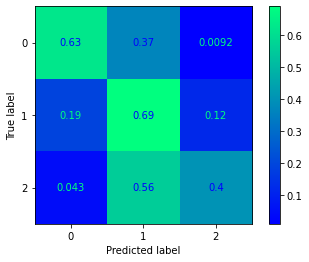

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.65       326
         0.0       0.57      0.69      0.62       447
         1.0       0.59      0.40      0.48       207
		 R2 Score: 0.19004917558576795

Logistic - L1, Train Accuracy = 0.6097498723838694, C=0.200966033475872
Test Accuracy = 0.6112244897959184


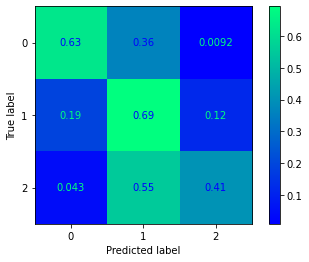

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       326
         0.0       0.57      0.69      0.63       447
         1.0       0.60      0.41      0.49       207
		 R2 Score: 0.19583453861729816

Logistic - L1, Train Accuracy = 0.6105155691679428, C=0.23884633223734736
Test Accuracy = 0.6091836734693877


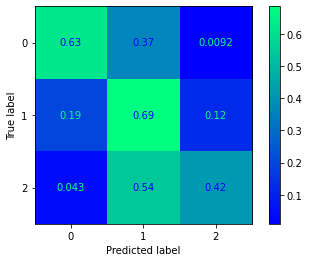

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.69      0.62       447
         1.0       0.60      0.42      0.49       207
		 R2 Score: 0.19197762992961132

Logistic - L1, Train Accuracy = 0.611791730474732, C=0.283866728305022
Test Accuracy = 0.6112244897959184


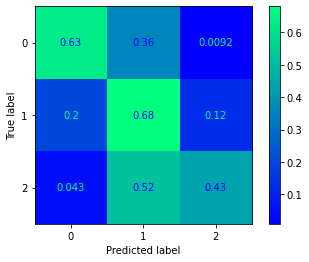

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.61      0.43      0.51       207
		 R2 Score: 0.19583453861729816

Logistic - L1, Train Accuracy = 0.6123021949974476, C=0.33737306612069967
Test Accuracy = 0.610204081632653


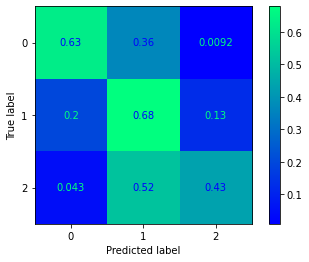

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.60      0.43      0.51       207
		 R2 Score: 0.1939060842734548

Logistic - L1, Train Accuracy = 0.6112812659520164, C=0.4009648697588076
Test Accuracy = 0.610204081632653


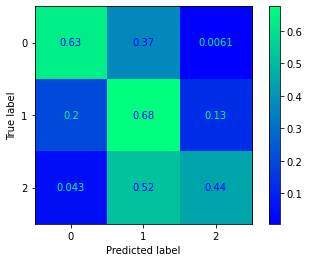

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.61      0.44      0.51       207
		 R2 Score: 0.199691447304985

Logistic - L1, Train Accuracy = 0.611791730474732, C=0.47654315926683666
Test Accuracy = 0.610204081632653


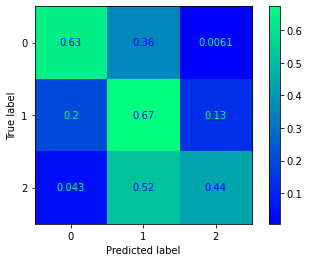

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.57      0.67      0.62       447
         1.0       0.60      0.44      0.51       207
		 R2 Score: 0.199691447304985

Logistic - L1, Train Accuracy = 0.6112812659520164, C=0.5663672799580199
Test Accuracy = 0.610204081632653


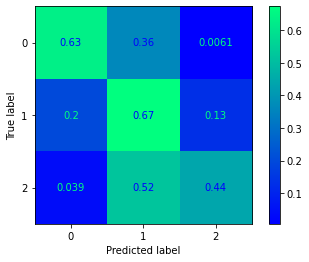

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.57      0.67      0.62       447
         1.0       0.60      0.44      0.51       207
		 R2 Score: 0.20547681033651521

Logistic - L1, Train Accuracy = 0.6105155691679428, C=0.6731224435170884
Test Accuracy = 0.610204081632653


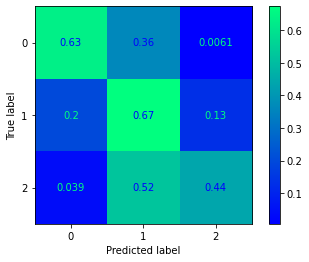

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.57      0.67      0.62       447
         1.0       0.60      0.44      0.51       207
		 R2 Score: 0.20547681033651521

Logistic - L1, Train Accuracy = 0.6100051046452272, C=0.8
Test Accuracy = 0.6112244897959184


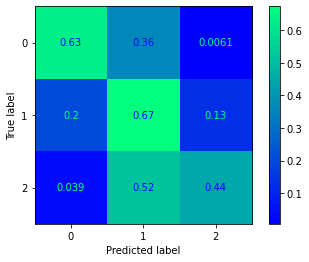

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.57      0.67      0.62       447
         1.0       0.61      0.44      0.51       207
		 R2 Score: 0.20740526468035858



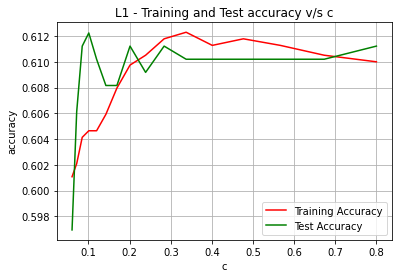

Logistic - L2, Train Accuracy = 0.6094946401225115, C=0.06
Test Accuracy = 0.6081632653061224


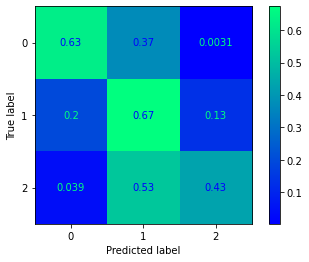

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.67      0.62       447
         1.0       0.60      0.43      0.51       207
		 R2 Score: 0.20740526468035858

Logistic - L2, Train Accuracy = 0.6082184788157223, C=0.07130946302904165
Test Accuracy = 0.610204081632653


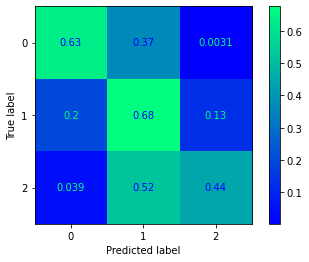

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.61      0.44      0.51       207
		 R2 Score: 0.21126217336804543

Logistic - L2, Train Accuracy = 0.6097498723838694, C=0.08475065862483763
Test Accuracy = 0.6112244897959184


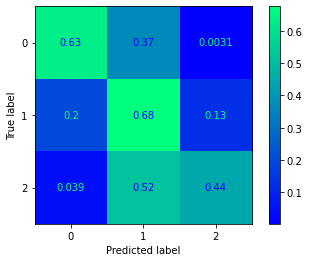

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.61      0.44      0.52       207
		 R2 Score: 0.2131906277118889

Logistic - L2, Train Accuracy = 0.6100051046452272, C=0.10072539929824649
Test Accuracy = 0.6122448979591837


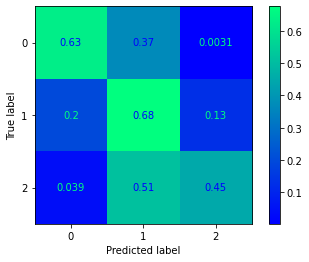

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.62      0.45      0.52       207
		 R2 Score: 0.21511908205573227

Logistic - L2, Train Accuracy = 0.6094946401225115, C=0.1197112356223961
Test Accuracy = 0.613265306122449


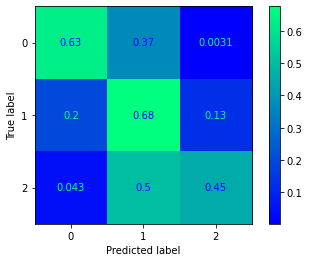

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.68      0.62       447
         1.0       0.62      0.45      0.52       207
		 R2 Score: 0.21126217336804543

Logistic - L2, Train Accuracy = 0.6112812659520164, C=0.1422757321796025
Test Accuracy = 0.6142857142857143


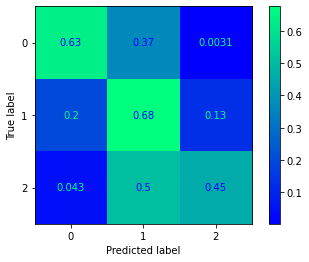

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.58      0.68      0.62       447
         1.0       0.62      0.45      0.52       207
		 R2 Score: 0.2131906277118889

Logistic - L2, Train Accuracy = 0.6128126595201634, C=0.16909343439651997
Test Accuracy = 0.6142857142857143


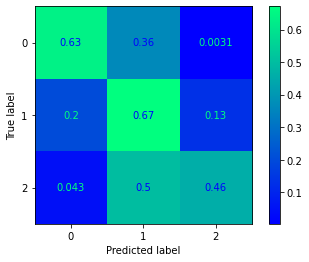

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.66       326
         0.0       0.58      0.67      0.62       447
         1.0       0.62      0.46      0.53       207
		 R2 Score: 0.2131906277118889

Logistic - L2, Train Accuracy = 0.610260336906585, C=0.200966033475872
Test Accuracy = 0.6122448979591837


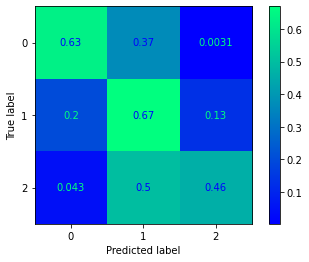

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.67      0.62       447
         1.0       0.61      0.46      0.52       207
		 R2 Score: 0.20933371902420206

Logistic - L2, Train Accuracy = 0.6110260336906586, C=0.23884633223734736
Test Accuracy = 0.613265306122449


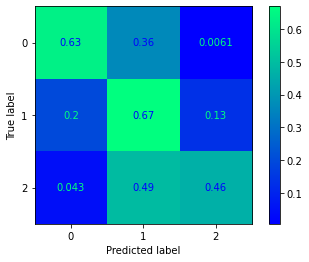

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.58      0.67      0.62       447
         1.0       0.61      0.46      0.53       207
		 R2 Score: 0.20547681033651521

Logistic - L2, Train Accuracy = 0.6110260336906586, C=0.283866728305022
Test Accuracy = 0.6122448979591837


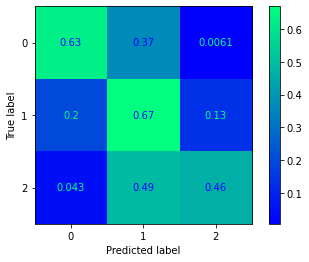

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.67      0.62       447
         1.0       0.61      0.46      0.53       207
		 R2 Score: 0.20354835599267185

Logistic - L2, Train Accuracy = 0.6097498723838694, C=0.33737306612069967
Test Accuracy = 0.613265306122449


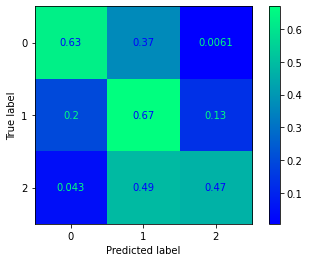

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.58      0.67      0.62       447
         1.0       0.61      0.47      0.53       207
		 R2 Score: 0.20547681033651521

Logistic - L2, Train Accuracy = 0.6097498723838694, C=0.4009648697588076
Test Accuracy = 0.6112244897959184


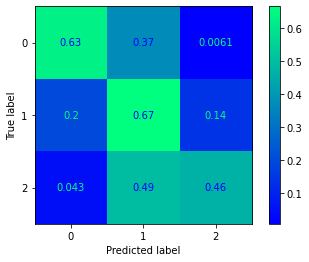

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.67      0.62       447
         1.0       0.60      0.46      0.52       207
		 R2 Score: 0.20161990164882837

Logistic - L2, Train Accuracy = 0.6100051046452272, C=0.47654315926683666
Test Accuracy = 0.6112244897959184


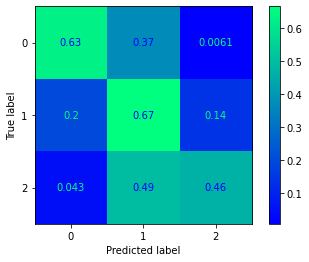

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.57      0.67      0.62       447
         1.0       0.60      0.46      0.52       207
		 R2 Score: 0.20161990164882837

Logistic - L2, Train Accuracy = 0.610260336906585, C=0.5663672799580199
Test Accuracy = 0.613265306122449


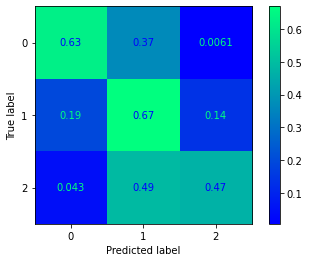

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.58      0.67      0.62       447
         1.0       0.61      0.47      0.53       207
		 R2 Score: 0.20547681033651521

Logistic - L2, Train Accuracy = 0.6094946401225115, C=0.6731224435170884
Test Accuracy = 0.613265306122449


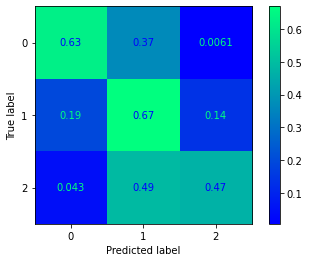

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.58      0.67      0.62       447
         1.0       0.61      0.47      0.53       207
		 R2 Score: 0.20547681033651521

Logistic - L2, Train Accuracy = 0.6089841755997958, C=0.8
Test Accuracy = 0.6142857142857143


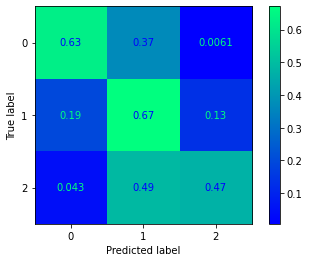

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       326
         0.0       0.58      0.67      0.62       447
         1.0       0.61      0.47      0.53       207
		 R2 Score: 0.20740526468035858



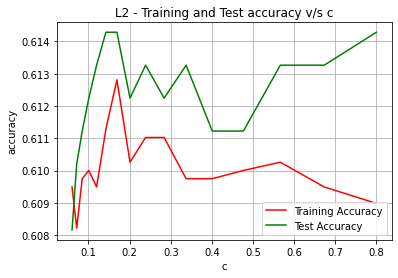

In [136]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train All Wines Data

In [137]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([   0,    0,    0,   30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([2836, 1277,    0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (6497, 12)
y[:10]:
[ 0.  0. -1. -1. -1. -1.  1.  0. -1.  0.]
X[:10, :]:
[[5.9000e+00 1.4000e-01 2.5000e-01 4.5000e+00 2.7000e-02 3.4000e+01
  1.4000e+02 9.9340e-01 3.4900e+00 5.1000e-01 1.0800e+01]
 [7.3000e+00 5.1000e-01 1.8000e-01 2.1000e+00 7.0000e-02 1.2000e+01
  2.8000e+01 9.9768e-01 3.5200e+00 7.3000e-01 9.5000e+00]
 [5.8000e+00 5.4000e-01 0.0000e+00 1.4000e+00 3.3000e-02 4.0000e+01
  1.0700e+02 9.8918e-01 3.2600e+00 3.5000e-01 1.2400e+01]
 [7.9000e+00 3.3000e-01 2.3000e-01 1.7000e+00 7.7000e-02 1.8000e+01
  4.5000e+01 9.9625e-01 3.2900e+00 6.5000e-01 9.3000e+00]
 [5.6000e+00 6.0500e-01 5.0000e-02 2.4000e+00 7.3000e-02 1.9000e+01
  2.5000e+01 9.9258e-01 3.5600e+00 5.5000e-01 1.2900e+01]
 [7.4000e+00 6.4000e-01 4.7000e-01 1.4150e+01

Logistic - L1, Train Accuracy = 0.5743698287473542, C=0.06
Test Accuracy = 0.5907692307692308


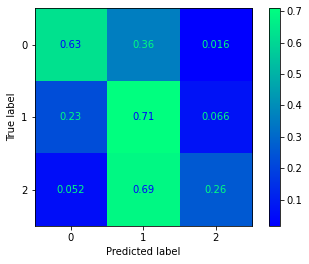

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.71      0.61       563
         1.0       0.59      0.26      0.36       251
		 R2 Score: 0.14329226083344881

Logistic - L1, Train Accuracy = 0.5739849913411583, C=0.07130946302904165
Test Accuracy = 0.5907692307692308


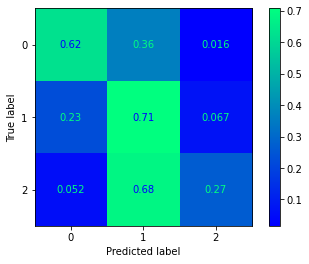

              precision    recall  f1-score   support

        -1.0       0.68      0.62      0.65       486
         0.0       0.53      0.71      0.61       563
         1.0       0.59      0.27      0.37       251
		 R2 Score: 0.14329226083344881

Logistic - L1, Train Accuracy = 0.5734077352318645, C=0.08475065862483763
Test Accuracy = 0.5915384615384616


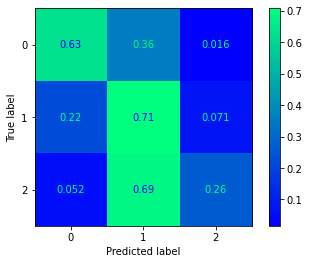

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       486
         0.0       0.54      0.71      0.61       563
         1.0       0.58      0.26      0.36       251
		 R2 Score: 0.14473210577322448

Logistic - L1, Train Accuracy = 0.5741774100442563, C=0.10072539929824649
Test Accuracy = 0.5907692307692308


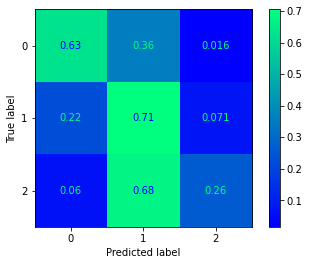

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.54      0.71      0.61       563
         1.0       0.58      0.26      0.36       251
		 R2 Score: 0.13465319119479446

Logistic - L1, Train Accuracy = 0.5747546661535501, C=0.1197112356223961
Test Accuracy = 0.5884615384615385


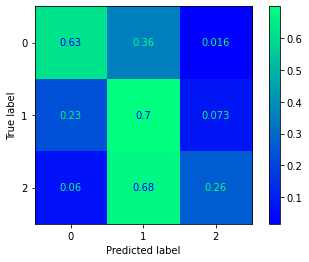

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.61       563
         1.0       0.57      0.26      0.36       251
		 R2 Score: 0.13033365637546734

Logistic - L1, Train Accuracy = 0.5736001539349624, C=0.1422757321796025
Test Accuracy = 0.5876923076923077


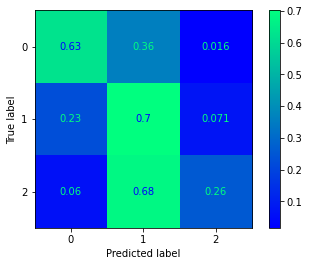

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.61       563
         1.0       0.58      0.26      0.36       251
		 R2 Score: 0.12889381143569156

Logistic - L1, Train Accuracy = 0.5741774100442563, C=0.16909343439651997
Test Accuracy = 0.5876923076923077


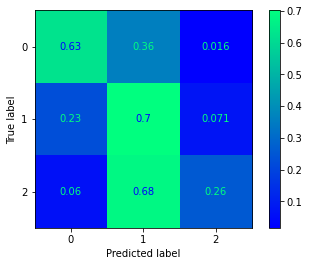

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.61       563
         1.0       0.58      0.26      0.36       251
		 R2 Score: 0.12889381143569156

Logistic - L1, Train Accuracy = 0.5737925726380604, C=0.200966033475872
Test Accuracy = 0.5869230769230769


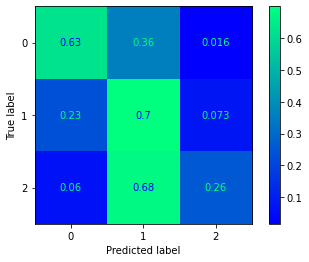

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.61       563
         1.0       0.57      0.26      0.36       251
		 R2 Score: 0.1274539664959159

Logistic - L1, Train Accuracy = 0.5739849913411583, C=0.23884633223734736
Test Accuracy = 0.5876923076923077


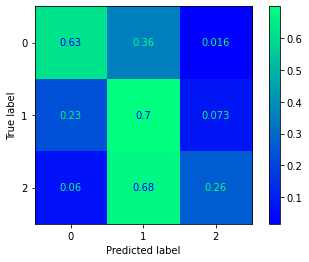

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.61       563
         1.0       0.57      0.26      0.36       251
		 R2 Score: 0.12889381143569156

Logistic - L1, Train Accuracy = 0.5737925726380604, C=0.283866728305022
Test Accuracy = 0.5853846153846154


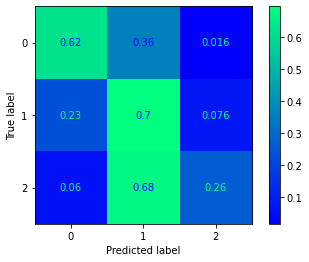

              precision    recall  f1-score   support

        -1.0       0.68      0.62      0.65       486
         0.0       0.53      0.70      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12457427661636444

Logistic - L1, Train Accuracy = 0.5736001539349624, C=0.33737306612069967
Test Accuracy = 0.5846153846153846


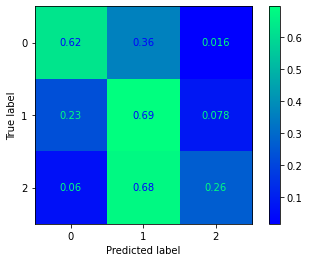

              precision    recall  f1-score   support

        -1.0       0.68      0.62      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12313443167658877

Logistic - L1, Train Accuracy = 0.5739849913411583, C=0.4009648697588076
Test Accuracy = 0.5853846153846154


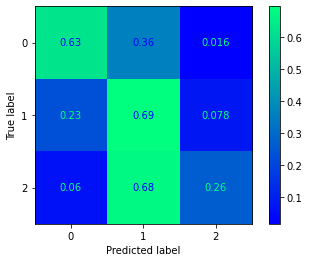

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12457427661636444

Logistic - L1, Train Accuracy = 0.5745622474504521, C=0.47654315926683666
Test Accuracy = 0.5853846153846154


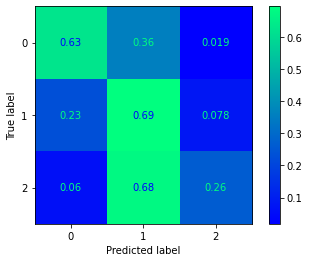

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.55      0.26      0.36       251
		 R2 Score: 0.12025474179703732

Logistic - L1, Train Accuracy = 0.5743698287473542, C=0.5663672799580199
Test Accuracy = 0.5853846153846154


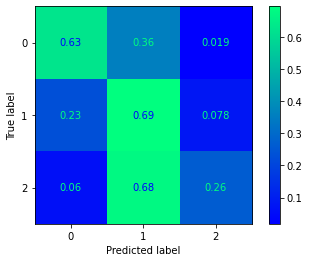

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.55      0.26      0.36       251
		 R2 Score: 0.12025474179703732

Logistic - L1, Train Accuracy = 0.5741774100442563, C=0.6731224435170884
Test Accuracy = 0.5853846153846154


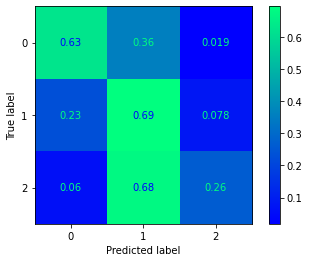

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.55      0.26      0.36       251
		 R2 Score: 0.12025474179703732

Logistic - L1, Train Accuracy = 0.5741774100442563, C=0.8
Test Accuracy = 0.5869230769230769


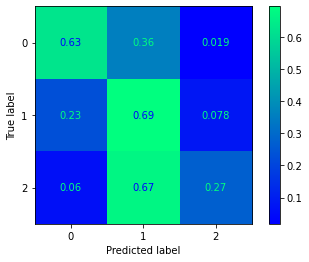

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877



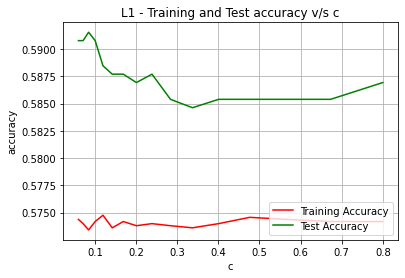

Logistic - L2, Train Accuracy = 0.5736001539349624, C=0.06
Test Accuracy = 0.5861538461538461


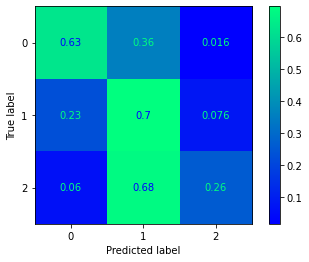

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.60       563
         1.0       0.56      0.26      0.35       251
		 R2 Score: 0.12601412155614022

Logistic - L2, Train Accuracy = 0.5741774100442563, C=0.07130946302904165
Test Accuracy = 0.5869230769230769


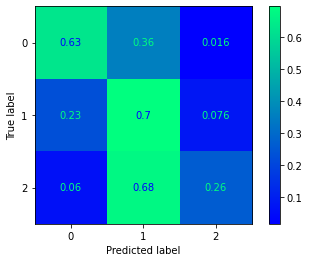

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.70      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.1274539664959159

Logistic - L2, Train Accuracy = 0.5745622474504521, C=0.08475065862483763
Test Accuracy = 0.5853846153846154


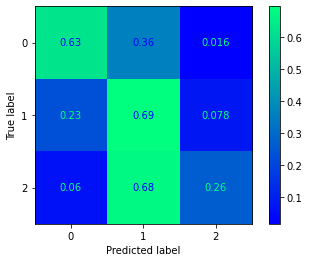

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12457427661636444

Logistic - L2, Train Accuracy = 0.5743698287473542, C=0.10072539929824649
Test Accuracy = 0.5853846153846154


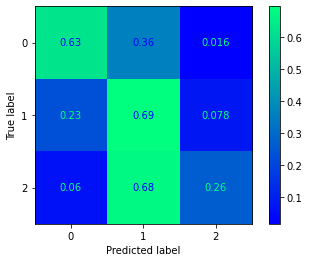

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12457427661636444

Logistic - L2, Train Accuracy = 0.5743698287473542, C=0.1197112356223961
Test Accuracy = 0.5853846153846154


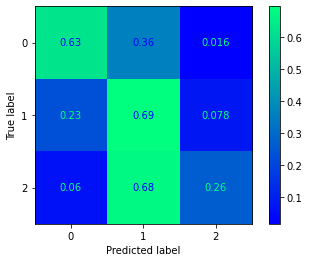

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12457427661636444

Logistic - L2, Train Accuracy = 0.5739849913411583, C=0.1422757321796025
Test Accuracy = 0.5853846153846154


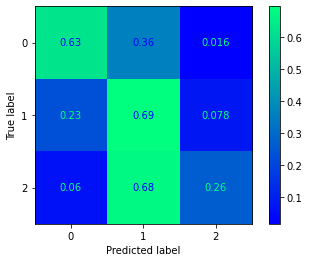

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.26      0.36       251
		 R2 Score: 0.12457427661636444

Logistic - L2, Train Accuracy = 0.5743698287473542, C=0.16909343439651997
Test Accuracy = 0.5853846153846154


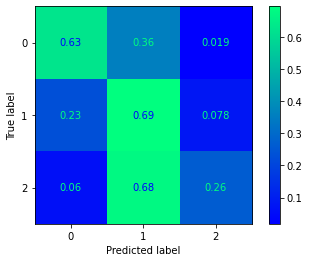

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.55      0.26      0.36       251
		 R2 Score: 0.12025474179703732

Logistic - L2, Train Accuracy = 0.5741774100442563, C=0.200966033475872
Test Accuracy = 0.5853846153846154


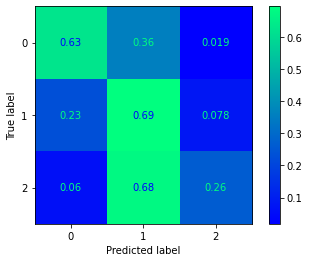

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.55      0.26      0.36       251
		 R2 Score: 0.12025474179703732

Logistic - L2, Train Accuracy = 0.5741774100442563, C=0.23884633223734736
Test Accuracy = 0.5853846153846154


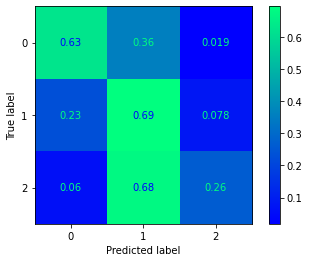

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.55      0.26      0.36       251
		 R2 Score: 0.12025474179703732

Logistic - L2, Train Accuracy = 0.5741774100442563, C=0.283866728305022
Test Accuracy = 0.5869230769230769


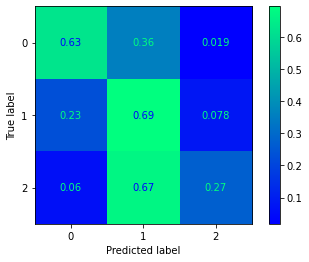

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877

Logistic - L2, Train Accuracy = 0.5743698287473542, C=0.33737306612069967
Test Accuracy = 0.5869230769230769


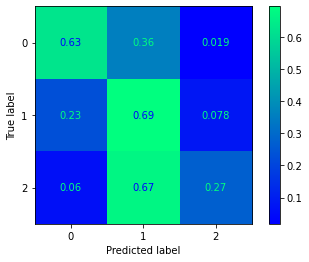

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877

Logistic - L2, Train Accuracy = 0.5745622474504521, C=0.4009648697588076
Test Accuracy = 0.5869230769230769


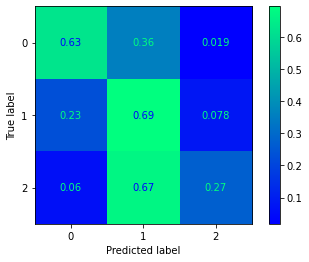

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877

Logistic - L2, Train Accuracy = 0.574947084856648, C=0.47654315926683666
Test Accuracy = 0.5869230769230769


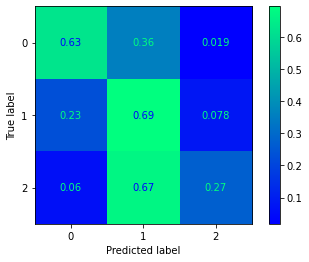

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877

Logistic - L2, Train Accuracy = 0.5747546661535501, C=0.5663672799580199
Test Accuracy = 0.5869230769230769


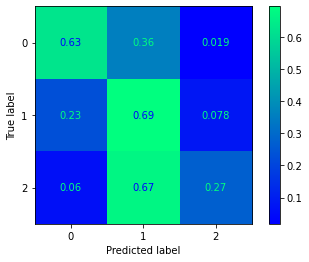

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877

Logistic - L2, Train Accuracy = 0.5745622474504521, C=0.6731224435170884
Test Accuracy = 0.5869230769230769


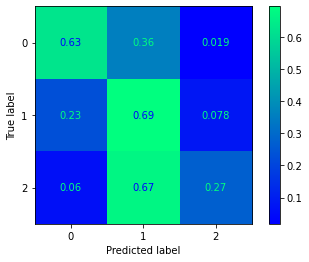

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877

Logistic - L2, Train Accuracy = 0.5747546661535501, C=0.8
Test Accuracy = 0.5869230769230769


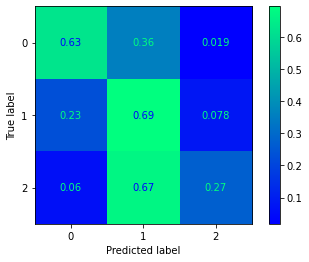

              precision    recall  f1-score   support

        -1.0       0.68      0.63      0.65       486
         0.0       0.53      0.69      0.60       563
         1.0       0.56      0.27      0.37       251
		 R2 Score: 0.12313443167658877



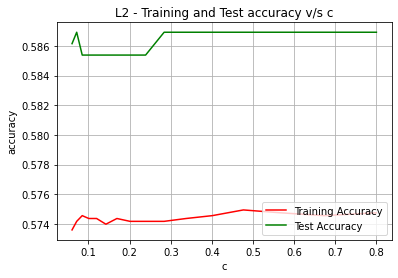

In [138]:
c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6016932845872619, C=0.06
Test Accuracy = 0.6053846153846154


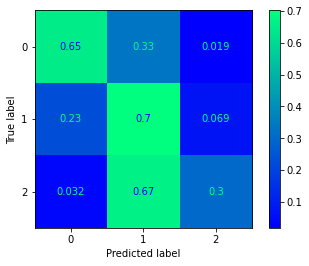

              precision    recall  f1-score   support

        -1.0       0.70      0.65      0.67       486
         0.0       0.55      0.70      0.61       563
         1.0       0.61      0.30      0.41       251
		 R2 Score: 0.18792745396649602

Logistic - L1, Train Accuracy = 0.5989994227438907, C=0.07130946302904165
Test Accuracy = 0.6023076923076923


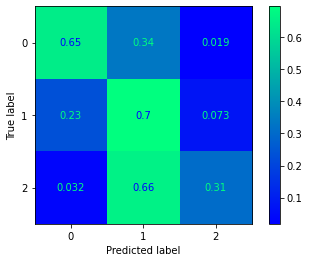

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.54      0.70      0.61       563
         1.0       0.61      0.31      0.41       251
		 R2 Score: 0.18216807420739312

Logistic - L1, Train Accuracy = 0.6009236097748701, C=0.08475065862483763
Test Accuracy = 0.6076923076923076


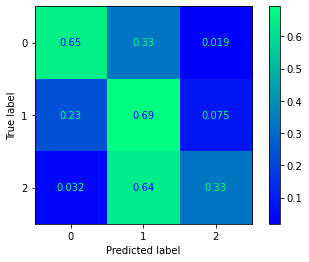

              precision    recall  f1-score   support

        -1.0       0.70      0.65      0.67       486
         0.0       0.55      0.69      0.61       563
         1.0       0.62      0.33      0.43       251
		 R2 Score: 0.19224698878582314

Logistic - L1, Train Accuracy = 0.6028477968058495, C=0.10072539929824649
Test Accuracy = 0.6038461538461538


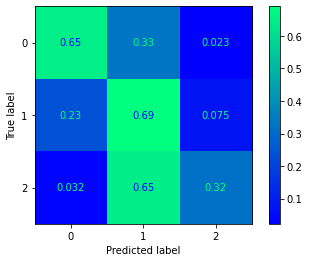

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.55      0.69      0.61       563
         1.0       0.60      0.32      0.42       251
		 R2 Score: 0.17640869444829022

Logistic - L1, Train Accuracy = 0.604579565133731, C=0.1197112356223961
Test Accuracy = 0.6038461538461538


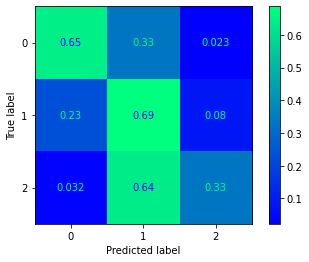

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.55      0.69      0.61       563
         1.0       0.60      0.33      0.43       251
		 R2 Score: 0.17640869444829022

Logistic - L1, Train Accuracy = 0.6072734269771022, C=0.1422757321796025
Test Accuracy = 0.6015384615384616


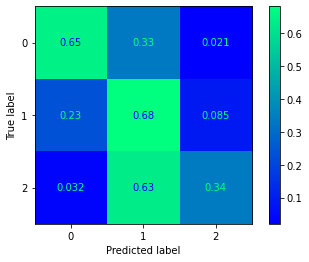

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.54      0.68      0.61       563
         1.0       0.59      0.34      0.43       251
		 R2 Score: 0.17640869444829022

Logistic - L1, Train Accuracy = 0.6063113334616125, C=0.16909343439651997
Test Accuracy = 0.6


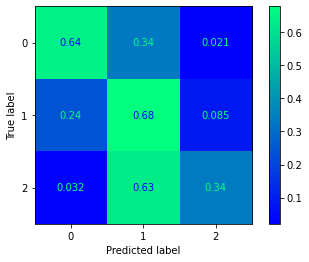

              precision    recall  f1-score   support

        -1.0       0.69      0.64      0.67       486
         0.0       0.54      0.68      0.60       563
         1.0       0.59      0.34      0.43       251
		 R2 Score: 0.17352900456873888

Logistic - L1, Train Accuracy = 0.604579565133731, C=0.200966033475872
Test Accuracy = 0.5961538461538461


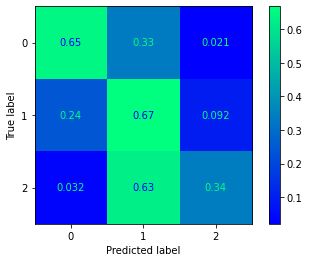

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.54      0.67      0.60       563
         1.0       0.58      0.34      0.43       251
		 R2 Score: 0.1663297798698602

Logistic - L1, Train Accuracy = 0.604579565133731, C=0.23884633223734736
Test Accuracy = 0.5984615384615385


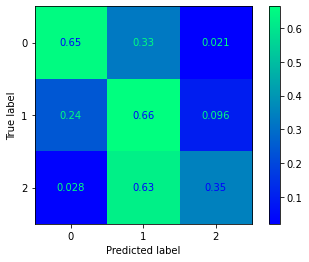

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.54      0.66      0.60       563
         1.0       0.58      0.35      0.43       251
		 R2 Score: 0.17496884950851455

Logistic - L1, Train Accuracy = 0.6049644025399269, C=0.283866728305022
Test Accuracy = 0.6015384615384616


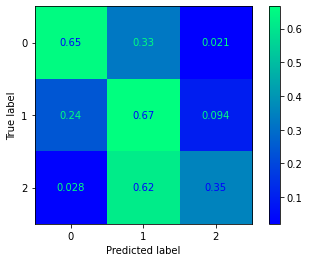

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.55      0.67      0.60       563
         1.0       0.59      0.35      0.44       251
		 R2 Score: 0.18072822926761745

Logistic - L1, Train Accuracy = 0.6066961708678084, C=0.33737306612069967
Test Accuracy = 0.6015384615384616


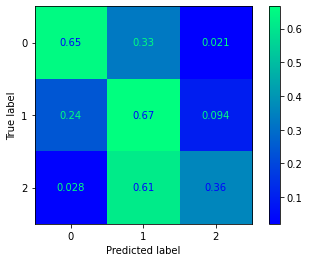

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.55      0.67      0.60       563
         1.0       0.59      0.36      0.45       251
		 R2 Score: 0.18072822926761745

Logistic - L1, Train Accuracy = 0.6070810082740042, C=0.4009648697588076
Test Accuracy = 0.6015384615384616


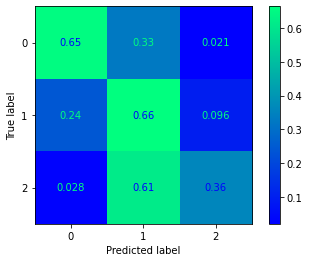

              precision    recall  f1-score   support

        -1.0       0.69      0.65      0.67       486
         0.0       0.55      0.66      0.60       563
         1.0       0.58      0.36      0.44       251
		 R2 Score: 0.18072822926761745

Logistic - L1, Train Accuracy = 0.6068885895709063, C=0.47654315926683666
Test Accuracy = 0.6030769230769231


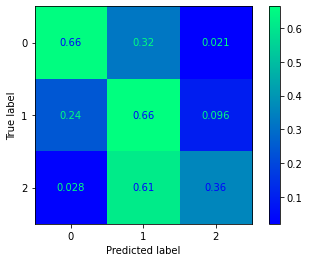

              precision    recall  f1-score   support

        -1.0       0.69      0.66      0.68       486
         0.0       0.55      0.66      0.60       563
         1.0       0.58      0.36      0.44       251
		 R2 Score: 0.18360791914716879

Logistic - L1, Train Accuracy = 0.6074658456802001, C=0.5663672799580199
Test Accuracy = 0.6023076923076923


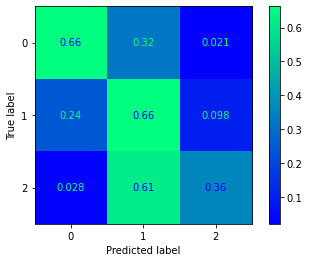

              precision    recall  f1-score   support

        -1.0       0.69      0.66      0.68       486
         0.0       0.55      0.66      0.60       563
         1.0       0.58      0.36      0.44       251
		 R2 Score: 0.18216807420739312



In [ ]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)